In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler

# Load the CSV files into DataFrames
df_1 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/test.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/train.csv')
df_1.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [26]:
#Concatenate DataFrames
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [27]:
df.shape

(129880, 25)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [30]:
# Check for any null values in the DataFrame
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes     

In [31]:
 # Remove rows with missing values
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
print(df.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [32]:
# Identify duplicates in dataframe
duplicates = df.duplicated()
duplicates_number = duplicates.sum()
duplicates_number

0

In [33]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

Unnamed: 0                           103656
id                                   129487
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [34]:
# Preprocess: Drop columns not useful for prediction
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [35]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [37]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [38]:
# Define the numerical columns
numerical_columns = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Function to calculate number of outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Calculate and print number of outliers for each numerical column
outliers_count = {col: count_outliers(df[col]) for col in numerical_columns}

# Display the number of outliers in each column
for col, count in outliers_count.items():
    print(f'Number of outliers in {col}: {count}')


Number of outliers in Age: 0
Number of outliers in Flight Distance: 2847
Number of outliers in Inflight wifi service: 0
Number of outliers in Departure/Arrival time convenient: 0
Number of outliers in Ease of Online booking: 0
Number of outliers in Gate location: 0
Number of outliers in Food and drink: 0
Number of outliers in Online boarding: 0
Number of outliers in Seat comfort: 0
Number of outliers in Inflight entertainment: 0
Number of outliers in On-board service: 0
Number of outliers in Leg room service: 0
Number of outliers in Baggage handling: 0
Number of outliers in Checkin service: 16059
Number of outliers in Inflight service: 0
Number of outliers in Cleanliness: 0
Number of outliers in Departure Delay in Minutes: 17970
Number of outliers in Arrival Delay in Minutes: 17492


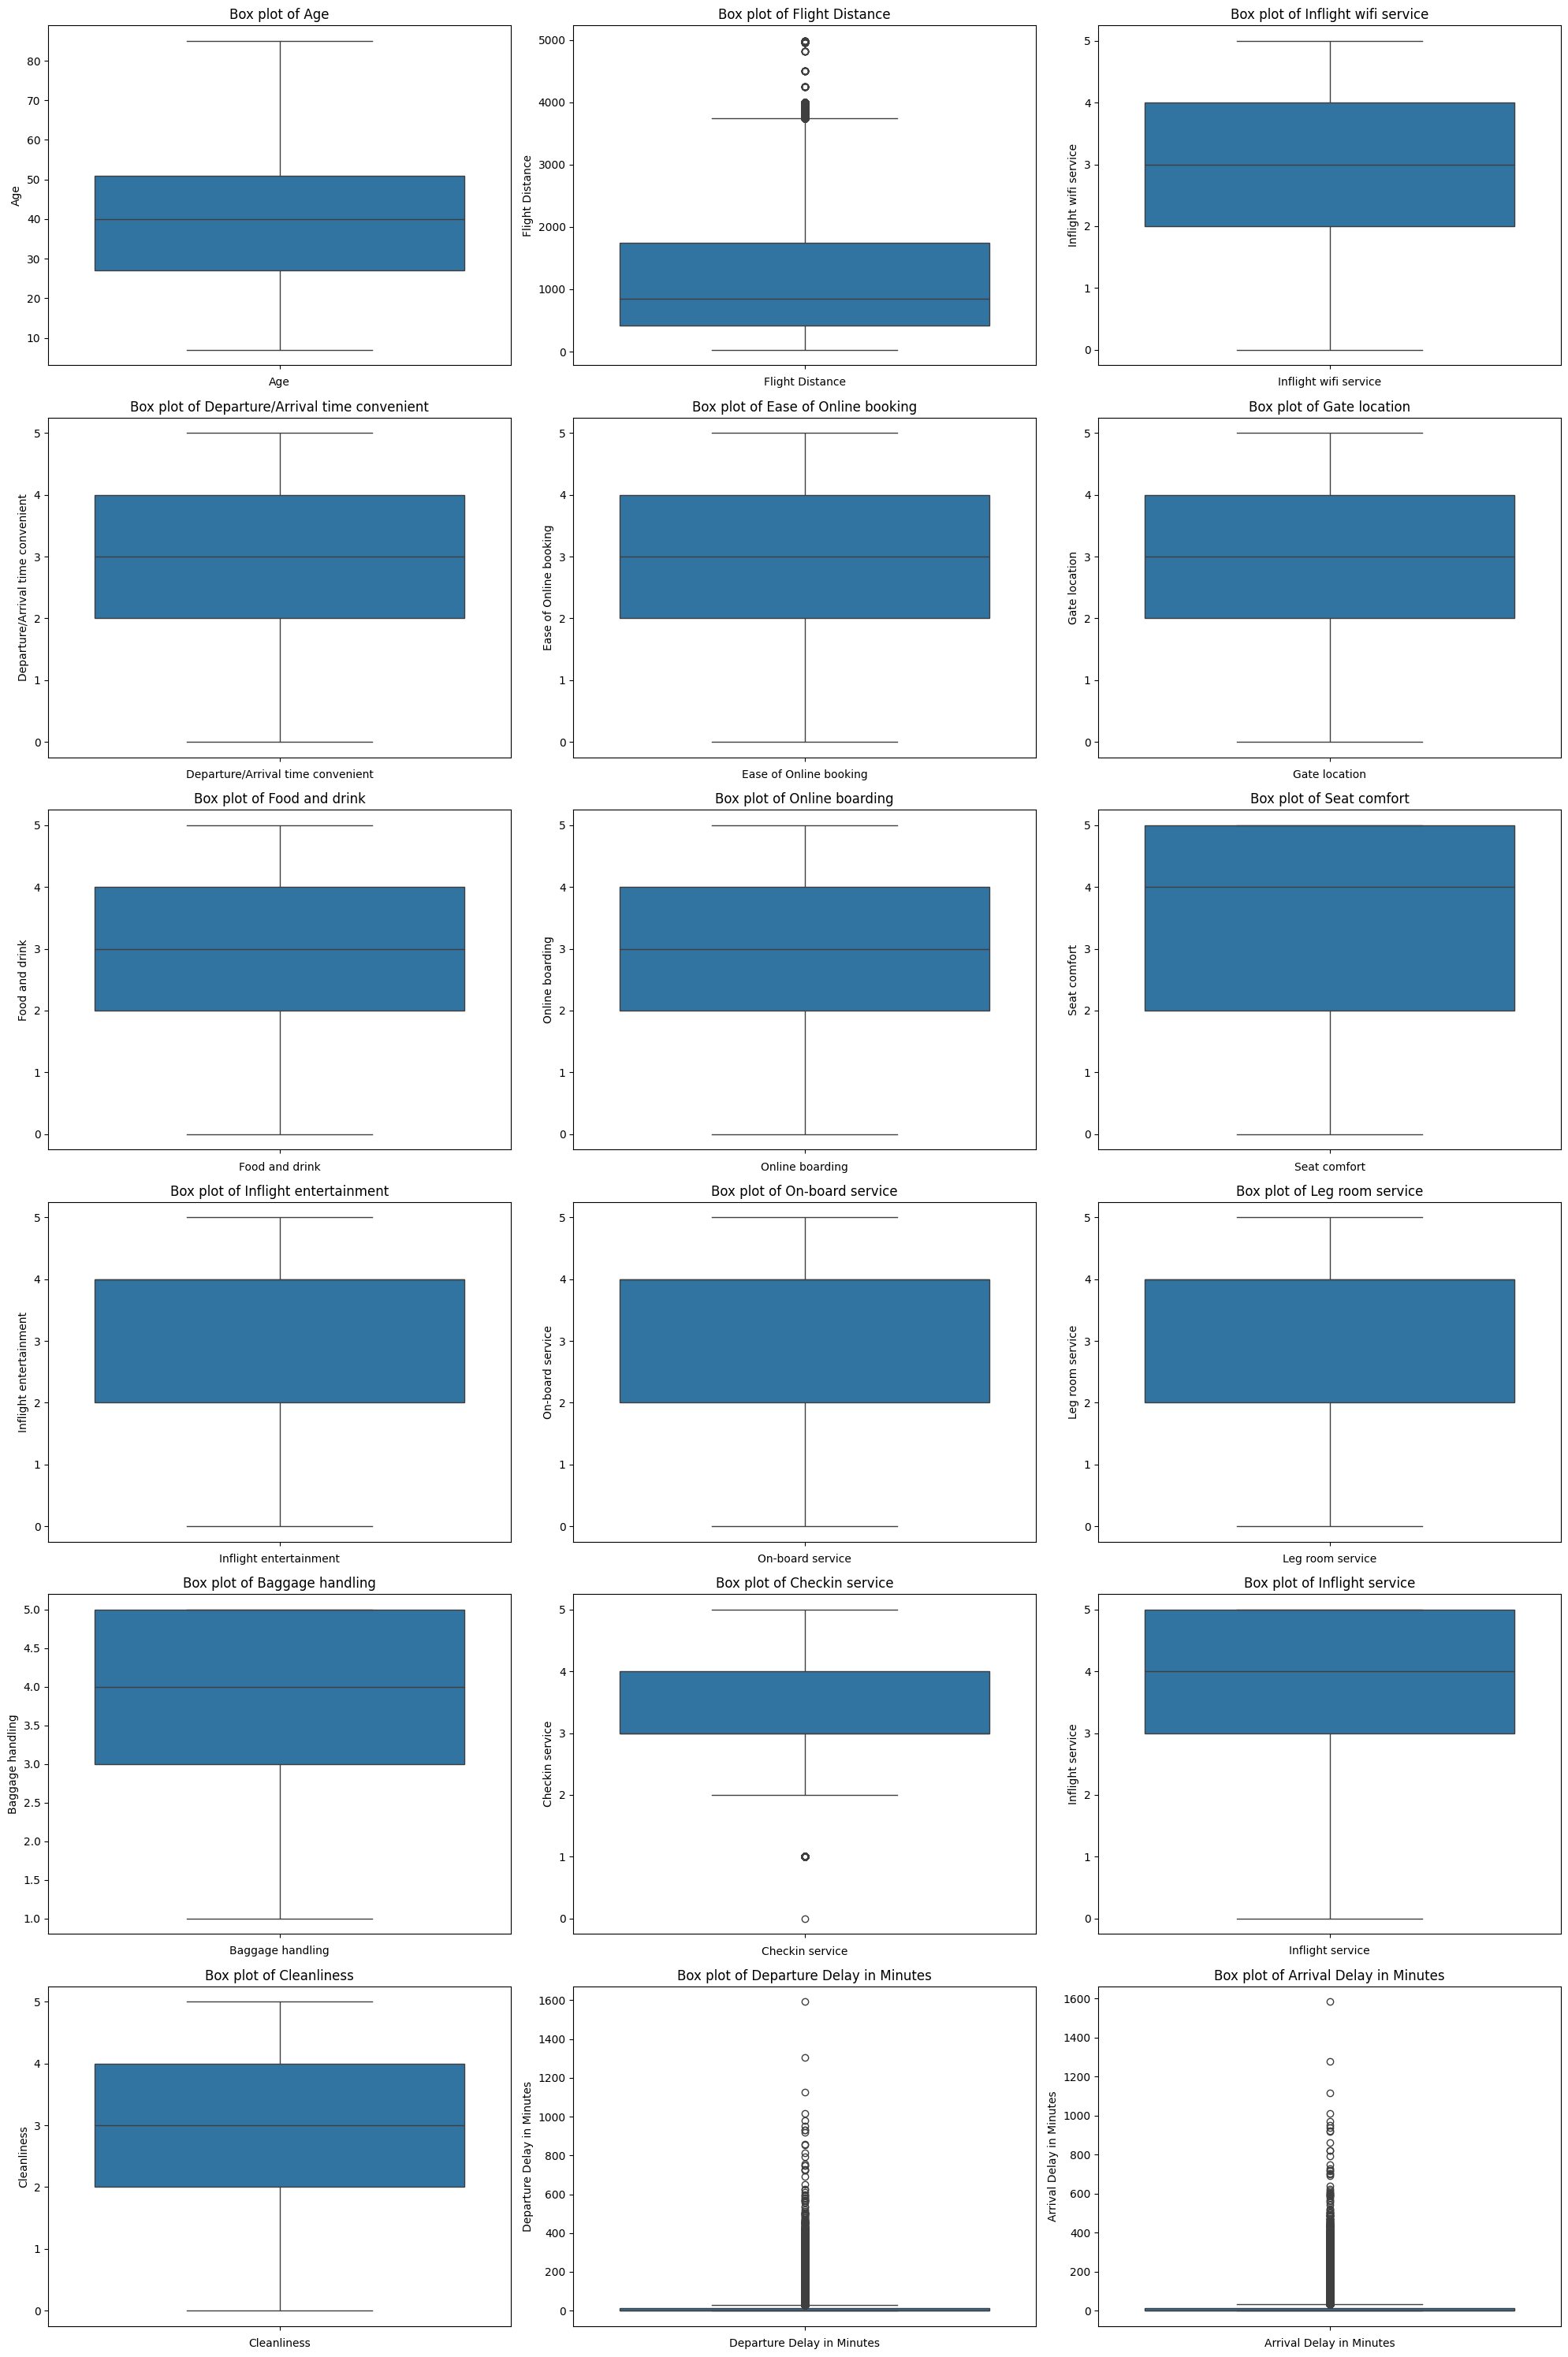

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns
numerical_columns = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Determine the layout dimensions based on the number of numerical columns
n_cols = 3  # Number of columns for the subplots
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)

plt.figure(figsize=(20, n_rows * 5))  # Adjust the height based on the number of rows

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df[column], orient='v')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [40]:
# Define the columns with outliers
outlier_columns = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','Checkin service']

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from specified columns
for column in outlier_columns:
    df = remove_outliers(df, column)

# Check the new shape of the dataframe
print("New shape of the dataframe after removing outliers:", df.shape)


New shape of the dataframe after removing outliers: (82637, 23)


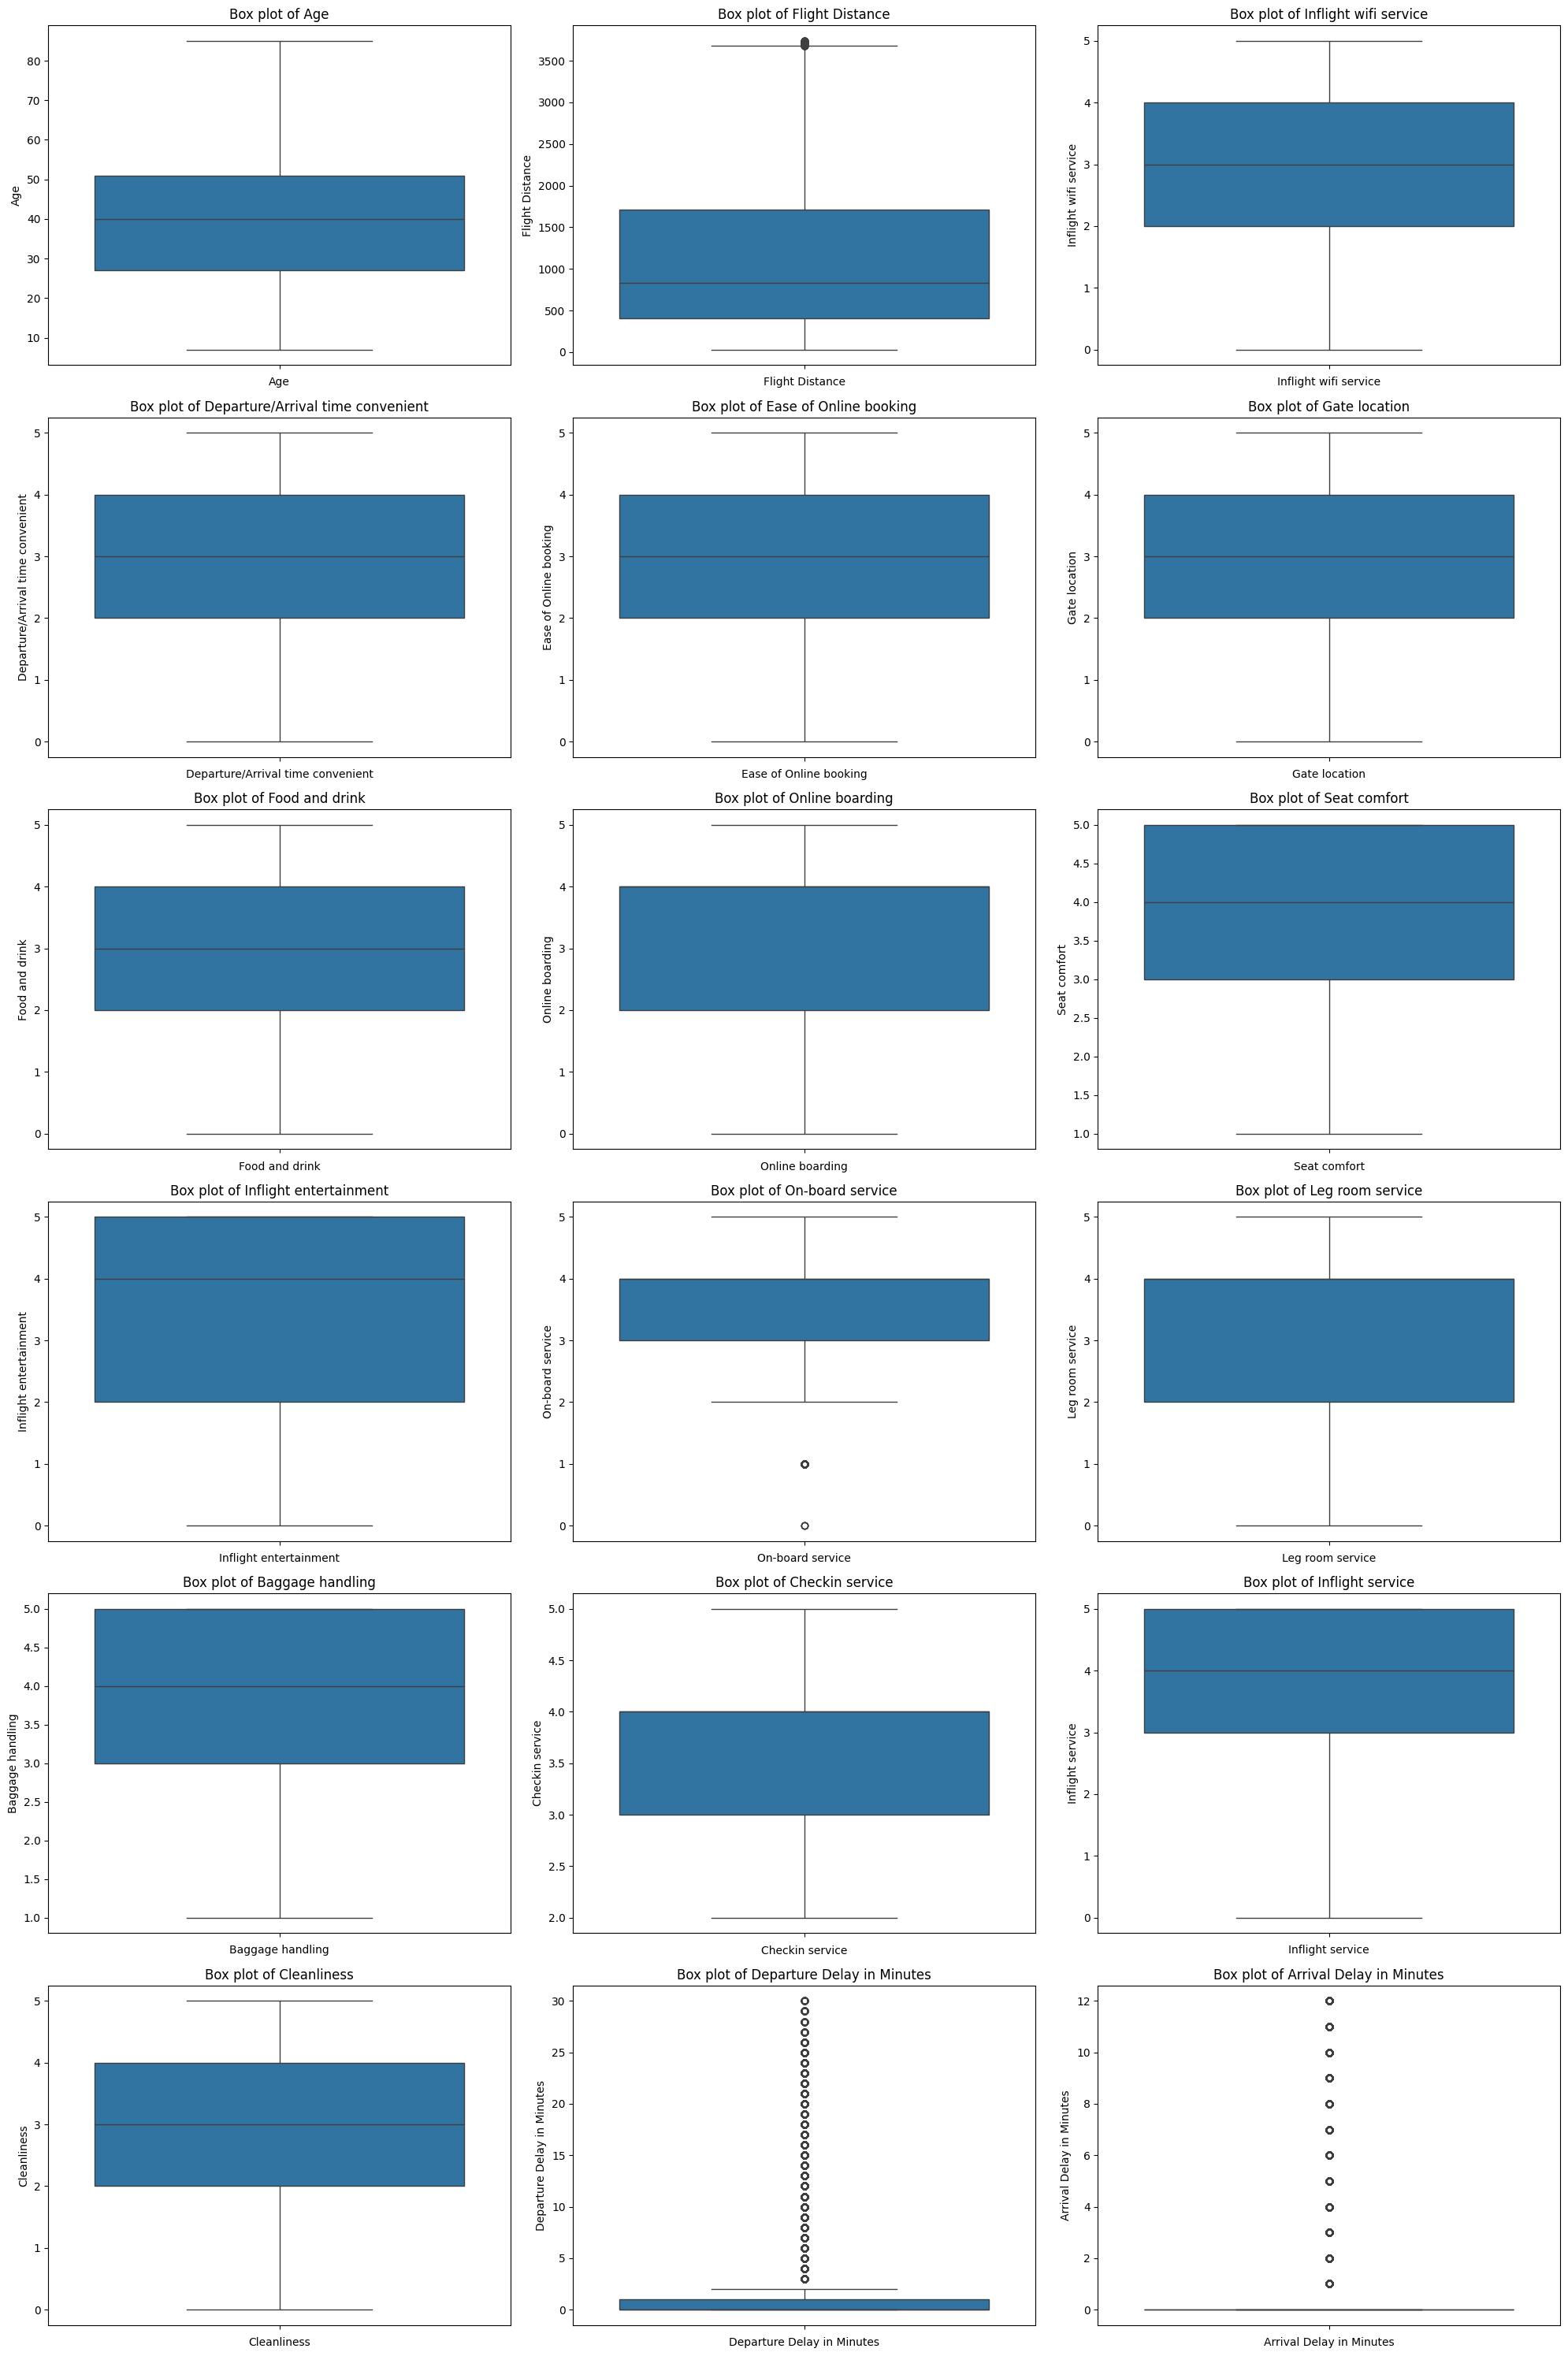

In [41]:

n_cols = 3  # Number of columns for the subplots
n_rows = (len(numerical_columns) // n_cols) + (len(numerical_columns) % n_cols > 0)

plt.figure(figsize=(20, n_rows * 5))  # Adjust the height based on the number of rows

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df[column], orient='v')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [42]:
# encode categorical variables
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_columns)
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
1,36,2863,1,1,3,1,5,4,5,4,...,satisfied,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,neutral or dissatisfied,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,satisfied,False,True,True,False,True,False,True,False,False
8,47,556,5,2,2,2,5,5,5,5,...,satisfied,False,True,True,False,True,False,False,True,False
11,33,325,2,5,5,5,1,3,4,2,...,neutral or dissatisfied,True,False,True,False,True,False,True,False,False


In [43]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    43067
satisfied                  39570
Name: count, dtype: int64

In [44]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
1,36,2863,1,1,3,1,5,4,5,4,...,1,True,False,True,False,True,False,True,False,False
2,20,192,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,1,False,True,True,False,True,False,True,False,False
8,47,556,5,2,2,2,5,5,5,5,...,1,False,True,True,False,True,False,False,True,False
11,33,325,2,5,5,5,1,3,4,2,...,0,True,False,True,False,True,False,True,False,False


In [45]:
# Define Features and Target Variable
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [46]:
#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.preprocessing import MinMaxScaler
#Scale the Features
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
#Train and Compare Multiple Classifier Models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
report_rf = classification_report(y_test, rf_y_pred)

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}\n")



Random Forest Classifier
Accuracy: 0.958797192642788
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8596
           1       0.97      0.94      0.96      7932

    accuracy                           0.96     16528
   macro avg       0.96      0.96      0.96     16528
weighted avg       0.96      0.96      0.96     16528




In [49]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_y_pred)
report_lr = classification_report(y_test, lr_y_pred)


print("Logistic Regression")
print(f"Accuracy: {accuracy_lr}")
print(f"Classification Report:\n{report_lr}\n")

Logistic Regression
Accuracy: 0.8705832526621491
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      8596
           1       0.88      0.84      0.86      7932

    accuracy                           0.87     16528
   macro avg       0.87      0.87      0.87     16528
weighted avg       0.87      0.87      0.87     16528




In [50]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, svc_y_pred)
report_svc = classification_report(y_test, svc_y_pred)


print("Support Vector Classifier")
print(f"Accuracy: {accuracy_svc}")
print(f"Classification Report:\n{report_svc}\n")


Support Vector Classifier
Accuracy: 0.9507502420135527
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8596
           1       0.96      0.94      0.95      7932

    accuracy                           0.95     16528
   macro avg       0.95      0.95      0.95     16528
weighted avg       0.95      0.95      0.95     16528




In [56]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
report_knn = classification_report(y_test, knn_y_pred)

print("K-Nearest Neighbors Classifier")
print(f"Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{report_knn}\n")



K-Nearest Neighbors Classifier
Accuracy: 0.9181389157792836
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      8596
           1       0.95      0.88      0.91      7932

    accuracy                           0.92     16528
   macro avg       0.92      0.92      0.92     16528
weighted avg       0.92      0.92      0.92     16528




In [57]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_y_pred)
report_nb = classification_report(y_test, nb_y_pred)

print("Naive Bayes Classifier")
print(f"Accuracy: {accuracy_nb}")
print(f"Classification Report:\n{report_nb}\n")


Naive Bayes Classifier
Accuracy: 0.8443852855759922
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      8596
           1       0.86      0.81      0.83      7932

    accuracy                           0.84     16528
   macro avg       0.85      0.84      0.84     16528
weighted avg       0.85      0.84      0.84     16528




In [58]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_y_pred)
report_dt = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt}")
print(f"Classification Report:\n{report_dt}\n")


Decision Tree Classifier
Accuracy: 0.9396176185866408
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8596
           1       0.93      0.94      0.94      7932

    accuracy                           0.94     16528
   macro avg       0.94      0.94      0.94     16528
weighted avg       0.94      0.94      0.94     16528




In [59]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_y_pred)
report_gb = classification_report(y_test, gb_y_pred)


print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{report_gb}\n")


Gradient Boosting Classifier
Accuracy: 0.943066311713456
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8596
           1       0.95      0.93      0.94      7932

    accuracy                           0.94     16528
   macro avg       0.94      0.94      0.94     16528
weighted avg       0.94      0.94      0.94     16528




In [60]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
report_xgb = classification_report(y_test, xgb_y_pred)


print("XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{report_xgb}\n")


XGBoost Classifier
Accuracy: 0.9566795740561471
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8596
           1       0.97      0.94      0.95      7932

    accuracy                           0.96     16528
   macro avg       0.96      0.96      0.96     16528
weighted avg       0.96      0.96      0.96     16528




In [66]:
# Function to calculate precision and recall from classification report
def get_precision_recall(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    return precision, recall

# Initialize lists to store precision and recall
precision_scores = []
recall_scores = []

# Calculate precision and recall for each model
for y_pred in [rf_y_pred, lr_y_pred, svc_y_pred, knn_y_pred, nb_y_pred, dt_y_pred, gb_y_pred, xgb_y_pred]:
    precision, recall = get_precision_recall(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Create the DataFrame
data = {
    "Model": ["Random Forest", "Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors",
              "Naive Bayes Classifier", "Decision Tree Classifier", "Gradient Boosting Classifier", "XGBoost Classifier"],
    "Accuracy": [accuracy_rf, accuracy_lr, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_gb, accuracy_xgb],
    "Precision": precision_scores,
    "Recall": recall_scores
}

accuracy_precision_recall_df = pd.DataFrame(data)

# Display the DataFrame
accuracy_precision_recall_df

# Sort the DataFrame by accuracy in descending order
accuracy_precision_recall_df_sorted = accuracy_precision_recall_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
accuracy_precision_recall_df_sorted





,Model,Accuracy,Precision,Recall
0,Random Forest,0.958797,0.959099,0.958797
7,XGBoost Classifier,0.956680,0.956886,0.956680
2,Support Vector Machine,0.950750,0.950926,0.950750
6,Gradient Boosting Classifier,0.943066,0.943180,0.943066
5,Decision Tree Classifier,0.939618,0.939658,0.939618
3,K-Nearest Neighbors,0.918139,0.919772,0.918139
1,Logistic Regression,0.870583,0.870948,0.870583
4,Naive Bayes Classifier,0.844385,0.845259,0.844385
